In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [4]:
!pip install -q numpy
!pip install -q matplotlib
!pip install -q pandas
!pip install -q tensorflow
!pip install -q scikit-learn
!pip install -q pandas-datareader
!pip install -q yfinance
!pip install --upgrade mplfinance
!pip install -q pmdarima

# Code Source Note: https://github.com/twopirllc/pandas-ta
!pip install -q pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import os
import sys
from google.colab import drive
drive.mount('/content/drive/')

# Set the working directory for the tasks
SKELETON_DIR = '/content/drive/MyDrive/stock-prediction/MachineLearning3'
os.chdir(SKELETON_DIR)

Mounted at /content/drive/


**Creating Training Datasets**

In [5]:
# Creating Training Datasets
from initialized import *
from datasets import create_datasets

# Datasets
data, df, train_data, test_data, train_feature_scaler, train_target_scaler, x_train, x_test, y_train, y_test = create_datasets(start, end, ticker)

Loading Existing Data
Loading Prepared Data
Loading Existing Train and Test Data
Train Data Shape: (942, 14)
Test Data Shape: (236, 14)


**LSTM Models**

In [6]:
# Intiailize Inputshape
input_shape = (x_train.shape[1], x_train.shape[2])

# Intiailize layer configs
layer_configs = [
    { 'type': 'GRU', 'units': 100, 'return_sequences': True, 'dropout': 0.2 },
    { 'type': 'GRU', 'units': 100, 'return_sequences': False, 'dropout': 0.2 }
]

In [7]:
from train import intialize_model, train_model, plot_metrics

# Intiailize Model
lstm_model = intialize_model(input_shape, layer_configs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 100)           33600     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 gru_1 (GRU)                 (None, 100)               60600     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 94301 (368.36 KB)
Trainable params: 94301 (368.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Learning rate:  0.001
Epoch 1/20
729/729 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.0027
Epoch 1: val_loss improved from inf to 0.00214, saving model to /content/drive/MyDrive/stock-prediction/MachineLearning3/best_model.pt

Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to /content/drive/MyDrive/stock-prediction/MachineLearning3/best_model_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


729/729 [==============================] - 40s 43ms/step - loss: 0.0075 - accuracy: 0.0027 - val_loss: 0.0021 - val_accuracy: 0.0000e+00 - lr: 0.0010
Learning rate:  0.001
Epoch 2/20
729/729 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.0027
Epoch 2: val_loss did not improve from 0.00214

Epoch 2: val_accuracy did not improve from 0.00000
729/729 [==============================] - 16s 22ms/step - loss: 0.0058 - accuracy: 0.0027 - val_loss: 0.0132 - val_accuracy: 0.0000e+00 - lr: 0.0010
Learning rate:  0.001
Epoch 3/20
728/729 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.0027
Epoch 3: val_loss improved from 0.00214 to 0.00210, saving model to /content/drive/MyDrive/stock-prediction/MachineLearning3/best_model.pt

Epoch 3: val_accuracy did not improve from 0.00000
729/729 [==============================] - 21s 29ms/step - loss: 0.0036 - accuracy: 0.0027 - val_loss: 0.0021 - val_accuracy: 0.0000e+00 - lr: 0.0010
Learning rate:  0.001
Ep

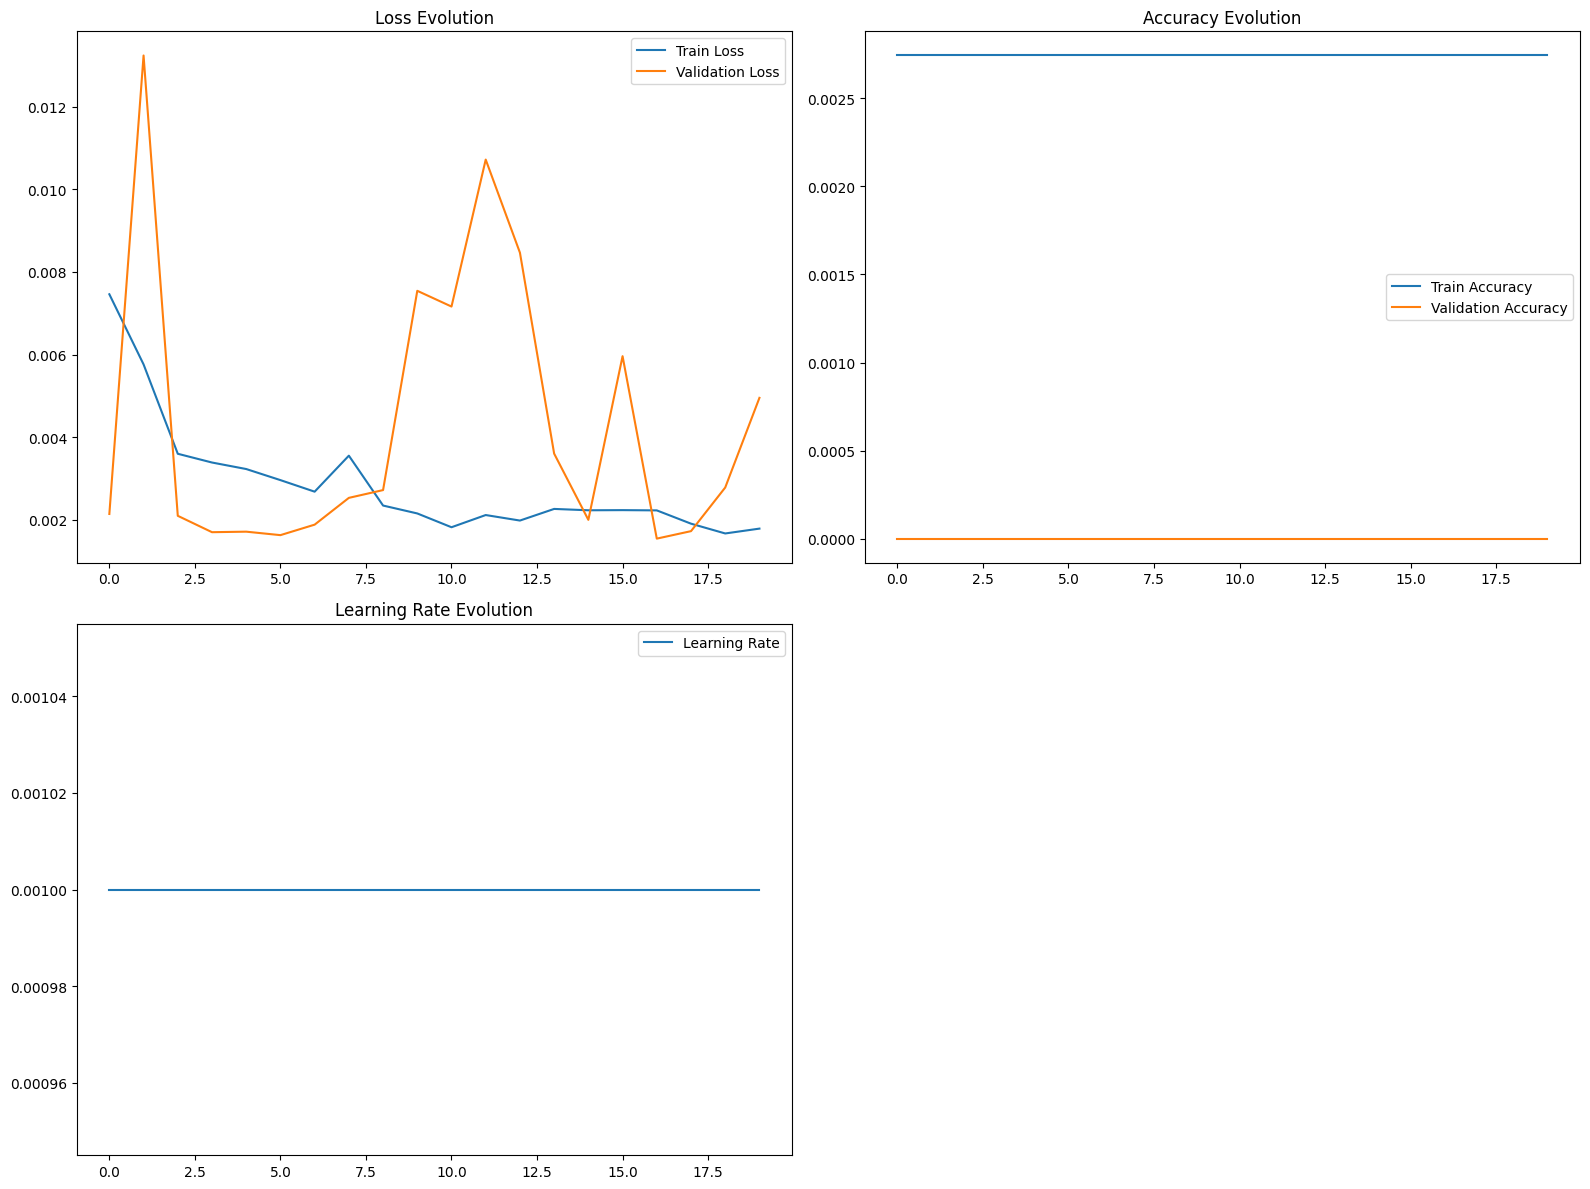

In [8]:
history = train_model(lstm_model, x_train, y_train, batch_size=1, epochs=20)
plot_metrics(history)

**LSTM Test Prediction**

In [9]:
from predict import lstm_predict_test
lstm_predictions, lstm_rmse = lstm_predict_test(lstm_model, train_target_scaler, x_test, y_test)
lstm_predictions.shape

7/7 [==============================] - 1s 13ms/step
RSME LSTM: 224.32917896280506


(206, 1)

**ARIMA Model Test Prediction**

In [10]:
from predict import arima_predict_test
arima_predictions, arima_rmse = arima_predict_test(train_data, test_data)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=8237.928, Time=0.73 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=6810.954, Time=1.11 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=7541.649, Time=1.30 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=8245.644, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=6959.854, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=6704.911, Time=3.10 sec
 ARIMA(1,0,0)(3,1,0)[7] intercept   : AIC=6673.398, Time=8.27 sec
 ARIMA(1,0,0)(4,1,0)[7] intercept   : AIC=6651.351, Time=12.49 sec
 ARIMA(1,0,0)(5,1,0)[7] intercept   : AIC=6626.211, Time=22.07 sec
 ARIMA(1,0,0)(5,1,1)[7] intercept   : AIC=inf, Time=42.13 sec
 ARIMA(1,0,0)(4,1,1)[7] intercept   : AIC=inf, Time=24.30 sec
 ARIMA(0,0,0)(5,1,0)[7] intercept   : AIC=8227.938, Time=17.18 sec
 ARIMA(2,0,0)(5,1,0)[7] intercept   : AIC=6627.566, Time=23.69 sec
 ARIMA(1,0,1)(5,1,0)[7] intercept   : AIC=6627.576, Time=26.67 sec
 ARIMA(0,0,1)(5,1,0)[7] intercept   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



**SARIMAX Model Test Predictions**

In [11]:
from predict import sarimax_predict_test
sarimax_predictions, sarimax_rmse = sarimax_predict_test(train_data, test_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  942
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3243.022
Date:                            Fri, 06 Oct 2023   AIC                           6498.043
Time:                                    09:17:35   BIC                           6527.048
Sample:                                01-02-2019   HQIC                          6509.106
                                     - 09-27-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume       1.05e-08    4.3e-09      2.443      0.015    2.08e-09    1.89e-08
ar.L1         -0.9029      0.006   

**Average Predictions (Ensemble Predictions Approach)**

In [11]:
print(f'LSTM: {lstm_predictions.shape}')
print(f'ARIMA: {arima_predictions.shape}')
print(f'SARIMAX: {sarimax_predictions.shape}')
print(f'Test Data: {test_data.shape}')

LSTM: (206, 1)
ARIMA: (236,)
SARIMAX: (236,)
Test Data: (236, 13)


In [12]:
def average_predictions(lstm_predictions, arima_predictions, sarimax_predictions, lstm_rmse, arima_rmse, sarimax_rmse, test_data):
    # Ensure lstm_predictions is a 1D array
    lstm_predictions = lstm_predictions.flatten()

    # Get overlapping period
    print('Get Overlapping Period')
    min_length = min(len(lstm_predictions), len(arima_predictions), len(sarimax_predictions))  # Since LSTM has the shortest length
    arima_predictions = arima_predictions[:min_length]
    sarimax_predictions = sarimax_predictions[:min_length]
    test_data = test_data[:min_length]

    print(f'LSTM shape after slicing: {lstm_predictions.shape}')
    print(f'ARIMA shape after slicing: {arima_predictions.shape}')
    print(f'SARIMAX shape after slicing: {sarimax_predictions.shape}')

    # Average predictions
    print('Average Predictions')
    avg_predictions = (lstm_predictions[:, np.newaxis] + arima_predictions[:, np.newaxis] + sarimax_predictions[:, np.newaxis]) / 3
    avg_predictions = avg_predictions.flatten()

    print(f'avg_predictions shape: {avg_predictions.shape}')
    print(f'test_data shape: {test_data.shape}')

    # 0 for NaN in Test
    test_data = np.nan_to_num(test_data)  # This replaces NaN with 0
    print(f'Test Data; {len(test_data)}')

    # Checking for NaN
    print("NaN in LSTM predictions:", np.isnan(lstm_predictions).any())
    print("NaN in ARIMA predictions:", np.isnan(arima_predictions).any())
    print("NaN in SARIMAX predictions:", np.isnan(sarimax_predictions).any())
    print("NaN in test data:", np.isnan(test_data).any())

    # Calculate RMSE for the ensemble predictions
    print('Ensemble RMSE')
    ensemble_rmse = np.sqrt(mean_squared_error(test_data, avg_predictions))

    # Calculate the average RMSE for the three models
    print('Avergage RMSE Model')
    avg_model_rmse = (lstm_rmse + arima_rmse + sarimax_rmse) / 3

    return avg_predictions, ensemble_rmse, avg_model_rmse


In [13]:
from sklearn.metrics import mean_squared_error
import numpy as np

avg_predictions, ensemble_rmse, avg_model_rmse = average_predictions(lstm_predictions,
                                                                     arima_predictions,
                                                                     sarimax_predictions,
                                                                     lstm_rmse, arima_rmse,
                                                                     sarimax_rmse,
                                                                     test_data['Close'])

print(f"Averaged Predictions: {avg_predictions}")
print(f"RMSE for Averaged Predictions: {ensemble_rmse}")
print(f"Average Model RMSE: {avg_model_rmse}")


Get Overlapping Period
LSTM shape after slicing: (206,)
ARIMA shape after slicing: (206,)
SARIMAX shape after slicing: (206,)
Average Predictions
avg_predictions shape: (206,)
test_data shape: (206,)
Test Data; 206
NaN in LSTM predictions: False
NaN in ARIMA predictions: False
NaN in SARIMAX predictions: False
NaN in test data: False
Ensemble RMSE
Avergage RMSE Model
Averaged Predictions: [263.5006196  260.28012819 262.689557   261.81779608 260.5813893
 261.26791769 259.69274335 259.94884094 258.99032569 254.53457883
 254.18547097 257.95889541 257.90956557 259.00599461 260.3048656
 263.85283186 263.15456592 262.78275692 258.94429883 258.92466609
 256.72352524 256.75889376 258.09222636 254.59721654 252.75582395
 249.69784178 250.34705916 249.78678565 250.26281567 248.22402929
 246.83187555 242.30503899 240.6092165  236.49962523 237.50455909
 241.06866735 241.35011609 237.03461029 237.37022882 234.47467441
 234.64429023 238.52130997 238.76971154 241.51143475 239.68788945
 238.02708498 24

In [14]:
import numpy as np
import plotly.graph_objects as go

def plot_predictions(train_data, test_data, lstm_predictions=None, arima_predictions=None, sarimax_predictions=None, avg_predictions=None):
    # Concatenate the train and test data
    full_data = np.concatenate((train_data['Close'], test_data['Close']))

    # Create arrays for the predictions with NaNs for the training portion
    lstm_with_nan = np.concatenate((np.full(train_data['Close'].shape, np.nan), lstm_predictions.flatten())) if lstm_predictions is not None else None
    arima_with_nan = np.concatenate((np.full(train_data['Close'].shape, np.nan), arima_predictions)) if arima_predictions is not None else None
    sarimax_with_nan = np.concatenate((np.full(train_data['Close'].shape, np.nan), sarimax_predictions)) if sarimax_predictions is not None else None
    avg_with_nan = np.concatenate((np.full(train_data['Close'].shape, np.nan), avg_predictions)) if avg_predictions is not None else None

    # Plot using plotly.graph_objects
    fig = go.Figure()

    # Plotting the full historical data
    fig.add_trace(go.Scatter(x=list(range(len(full_data))),
                             y=full_data,
                             mode='lines',
                             name='Historical Data',
                             line=dict(color='blue')))

    if lstm_predictions is not None:
        # Overlaying the LSTM predictions
        fig.add_trace(go.Scatter(x=list(range(len(lstm_with_nan))),
                                 y=lstm_with_nan,
                                 mode='lines',
                                 name='LSTM Predictions',
                                 line=dict(color='green', dash='dash')))

    if arima_predictions is not None:
        # Overlaying the ARIMA predictions
        fig.add_trace(go.Scatter(x=list(range(len(arima_with_nan))),
                                 y=arima_with_nan,
                                 mode='lines',
                                 name='ARIMA Predictions',
                                 line=dict(color='red', dash='dash')))

    if sarimax_predictions is not None:
        # Overlaying the SARIMAX predictions
        fig.add_trace(go.Scatter(x=list(range(len(sarimax_with_nan))),
                                 y=sarimax_with_nan,
                                 mode='lines',
                                 name='SARIMAX Predictions',
                                 line=dict(color='purple', dash='dash')))

    if avg_predictions is not None:
        # Overlaying the averaged predictions
        fig.add_trace(go.Scatter(x=list(range(len(avg_with_nan))),
                                 y=avg_with_nan,
                                 mode='lines',
                                 name='Averaged Predictions',
                                 line=dict(color='orange', dash='dot')))

    # Formatting the plot
    fig.update_layout(title=f"{ticker} Historical vs Predictions",
                      xaxis_title="Timestep",
                      yaxis_title="Stock Price",
                      plot_bgcolor='#FFFFFF',
                      xaxis=dict(gridcolor='lightgrey'),
                      yaxis=dict(gridcolor='lightgrey'),
                      margin=dict(l=0, r=0, t=30, b=0),
                      legend_orientation="h",
                      legend=dict(x=.5, xanchor="center"))

    fig.show()

In [15]:
plot_predictions(train_data, test_data, lstm_predictions, arima_predictions, sarimax_predictions, avg_predictions)

Config 1

In [16]:
arima_predictions_1, arima_rmse_1 = arima_predict_test(train_data, test_data, start_p=0, max_p=1, start_q=0, max_q=1)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=8237.928, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=6810.954, Time=1.07 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=7541.649, Time=1.36 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=8245.644, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=6959.854, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=6704.911, Time=3.08 sec
 ARIMA(1,0,0)(3,1,0)[7] intercept   : AIC=6673.398, Time=8.20 sec
 ARIMA(1,0,0)(4,1,0)[7] intercept   : AIC=6651.351, Time=11.90 sec
 ARIMA(1,0,0)(5,1,0)[7] intercept   : AIC=6626.211, Time=22.49 sec
 ARIMA(1,0,0)(5,1,1)[7] intercept   : AIC=inf, Time=42.50 sec
 ARIMA(1,0,0)(4,1,1)[7] intercept   : AIC=inf, Time=21.64 sec
 ARIMA(0,0,0)(5,1,0)[7] intercept   : AIC=8227.938, Time=16.35 sec
 ARIMA(1,0,1)(5,1,0)[7] intercept   : AIC=6627.576, Time=26.73 sec
 ARIMA(0,0,1)(5,1,0)[7] intercept   : AIC=7535.668, Time=20.40 sec
 ARIMA(1,0,0)(5,1,0)[7]             

In [20]:
data, df, train_data, test_data, train_feature_scaler, train_target_scaler, x_train, x_test, y_train, y_test = create_datasets(start, end, ticker)
sarimax_predictions_1, sarimax_rmse_1 = sarimax_predict_test(train_data, test_data, order=(0, 1, 0), seasonal_order=(0, 1, 0, 7))

Loading Existing Data
Loading Prepared Data
Loading Existing Train and Test Data
Train Data Shape: (942, 14)
Test Data Shape: (236, 14)


Optimization terminated successfully.
         Current function value: 3.717492
         Iterations: 55
         Function evaluations: 107
                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  942
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 7)   Log Likelihood               -3501.878
Date:                           Fri, 06 Oct 2023   AIC                           7007.755
Time:                                   09:23:04   BIC                           7017.434
Sample:                               01-02-2019   HQIC                          7011.446
                                    - 09-27-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [21]:
avg_predictions, ensemble_rmse, avg_model_rmse = average_predictions(lstm_predictions,
                                                                     arima_predictions_1,
                                                                     sarimax_predictions_1,
                                                                     lstm_rmse,
                                                                     arima_rmse_1,
                                                                     sarimax_rmse_1,
                                                                     test_data['Close'])

Get Overlapping Period
LSTM shape after slicing: (206,)
ARIMA shape after slicing: (206,)
SARIMAX shape after slicing: (206,)
Average Predictions
avg_predictions shape: (206,)
test_data shape: (206,)
Test Data; 206
NaN in LSTM predictions: False
NaN in ARIMA predictions: False
NaN in SARIMAX predictions: False
NaN in test data: False
Ensemble RMSE
Avergage RMSE Model


In [22]:
plot_predictions(train_data,
                 test_data,
                 lstm_predictions,
                 arima_predictions_1,
                 sarimax_predictions_1,
                 avg_predictions)

Config 2

In [27]:
arima_predictions_2, arima_rmse_2 = arima_predict_test(train_data, test_data, start_p=1, max_p=2, start_q=1, max_q=2)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=6954.244, Time=0.66 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=8237.928, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=6810.954, Time=1.03 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=7541.649, Time=1.29 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=8245.644, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=6959.854, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=6704.911, Time=6.04 sec
 ARIMA(1,0,0)(3,1,0)[7] intercept   : AIC=6673.398, Time=5.89 sec
 ARIMA(1,0,0)(4,1,0)[7] intercept   : AIC=6651.351, Time=12.73 sec
 ARIMA(1,0,0)(5,1,0)[7] intercept   : AIC=6626.211, Time=21.14 sec
 ARIMA(1,0,0)(5,1,1)[7] intercept   : AIC=inf, Time=41.78 sec
 ARIMA(1,0,0)(4,1,1)[7] intercept   : AIC=inf, Time=21.85 sec
 ARIMA(0,0,0)(5,1,0)[7] intercept   : AIC=8227.938, Time=16.80 sec
 ARIMA(2,0,0)(5,1,0)[7] intercept   : AIC=6627.566, Time=22.92 sec
 ARIMA(1,0,1)(5,1,0)[7] intercept   :

In [23]:
data, df, train_data, test_data, train_feature_scaler, train_target_scaler, x_train, x_test, y_train, y_test = create_datasets(start, end, ticker)
sarimax_predictions_2, sarimax_rmse_2 = sarimax_predict_test(train_data, test_data, order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))

Loading Existing Data
Loading Prepared Data
Loading Existing Train and Test Data
Train Data Shape: (942, 14)
Test Data Shape: (236, 14)


                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  942
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -3258.246
Date:                           Fri, 06 Oct 2023   AIC                           6528.491
Time:                                   09:24:26   BIC                           6557.579
Sample:                               01-02-2019   HQIC                          6539.578
                                    - 09-27-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      7.115e-09   4.06e-09      1.753      0.080   -8.42e-10    1.51e-08
ar.L1          0.9989      0.001   1059.420

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [28]:
avg_predictions, ensemble_rmse, avg_model_rmse = average_predictions(lstm_predictions,
                                                                     arima_predictions_2,
                                                                     sarimax_predictions_2,
                                                                     lstm_rmse,
                                                                     arima_rmse_2,
                                                                     sarimax_rmse_2,
                                                                     test_data['Close'])

Get Overlapping Period
LSTM shape after slicing: (206,)
ARIMA shape after slicing: (206,)
SARIMAX shape after slicing: (206,)
Average Predictions
avg_predictions shape: (206,)
test_data shape: (206,)
Test Data; 206
NaN in LSTM predictions: False
NaN in ARIMA predictions: False
NaN in SARIMAX predictions: False
NaN in test data: False
Ensemble RMSE
Avergage RMSE Model


In [29]:
plot_predictions(train_data,
                 test_data,
                 lstm_predictions,
                 arima_predictions_2,
                 sarimax_predictions_2,
                 avg_predictions)

Config 3

In [30]:
arima_predictions_3, arima_rmse_3 = arima_predict_test(train_data, test_data, start_p=0, max_p=2, start_q=0, max_q=2)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=8237.928, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=6810.954, Time=1.06 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=7541.649, Time=1.30 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=8245.644, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=6959.854, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=6704.911, Time=3.05 sec
 ARIMA(1,0,0)(3,1,0)[7] intercept   : AIC=6673.398, Time=6.67 sec
 ARIMA(1,0,0)(4,1,0)[7] intercept   : AIC=6651.351, Time=11.50 sec
 ARIMA(1,0,0)(5,1,0)[7] intercept   : AIC=6626.211, Time=26.57 sec
 ARIMA(1,0,0)(5,1,1)[7] intercept   : AIC=inf, Time=41.84 sec
 ARIMA(1,0,0)(4,1,1)[7] intercept   : AIC=inf, Time=21.32 sec
 ARIMA(0,0,0)(5,1,0)[7] intercept   : AIC=8227.938, Time=16.25 sec
 ARIMA(2,0,0)(5,1,0)[7] intercept   : AIC=6627.566, Time=24.04 sec
 ARIMA(1,0,1)(5,1,0)[7] intercept   : AIC=6627.576, Time=24.04 sec
 ARIMA(0,0,1)(5,1,0)[7] intercept   

In [25]:
data, df, train_data, test_data, train_feature_scaler, train_target_scaler, x_train, x_test, y_train, y_test = create_datasets(start, end, ticker)
sarimax_predictions_3, sarimax_rmse_3 = sarimax_predict_test(train_data, test_data, order=(0, 1, 1), seasonal_order=(0, 1, 1, 7))

Loading Existing Data
Loading Prepared Data
Loading Existing Train and Test Data
Train Data Shape: (942, 14)
Test Data Shape: (236, 14)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  942
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -3247.501
Date:                           Fri, 06 Oct 2023   AIC                           6503.002
Time:                                   09:25:21   BIC                           6522.360
Sample:                               01-02-2019   HQIC                          6510.384
                                    - 09-27-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      9.146e-09   4.34e-09      2.107      0.035     6.4e-10    1.77e-08
ma.L1         -0.0294      0.024     -1.222

In [31]:
avg_predictions, ensemble_rmse, avg_model_rmse = average_predictions(lstm_predictions,
                                                                     arima_predictions_3,
                                                                     sarimax_predictions_3,
                                                                     lstm_rmse,
                                                                     arima_rmse_3,
                                                                     sarimax_rmse_3,
                                                                     test_data['Close'])

Get Overlapping Period
LSTM shape after slicing: (206,)
ARIMA shape after slicing: (206,)
SARIMAX shape after slicing: (206,)
Average Predictions
avg_predictions shape: (206,)
test_data shape: (206,)
Test Data; 206
NaN in LSTM predictions: False
NaN in ARIMA predictions: False
NaN in SARIMAX predictions: False
NaN in test data: False
Ensemble RMSE
Avergage RMSE Model


In [32]:
plot_predictions(train_data,
                 test_data,
                 lstm_predictions,
                 arima_predictions_3,
                 sarimax_predictions_3,
                 avg_predictions)

Config 4